<a href="https://colab.research.google.com/github/shk0349/AI_Study_24/blob/master/%EC%9D%B8%EA%B3%B5%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B8%B0%ED%83%80%EB%8F%84%EA%B5%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
# 인공신경망을 구성하는 기본절차
    # 1. 더미데이터 준비
    # 2. 훈련용, 검증용, 테스트용으로 데이터 분리
    # 3. 심층 구성(dense)
    # 4. model에 적용
    # 5. compile 진행(최적화 기법 적용 / adam)
    # 6. fit(훈련)
    # 7. evaluate(검증)

In [57]:
# 손실곡선 : fit() 메서드로 모델을 훈련하는 동안 훈련과정을 상세하게 출력 및 확인가능(epoch 회수, 손실, 정확도 등)
    # <keras.src.callbacks.history.History at 0x7888067e4940> 이런 메세지가 출력됨
    # colab 코드셀은 print() 명령어를 사용하지 않아도 마지막 라인에 실행결과를 자동으로 출력

# 다시말해 fit() 메서드는 History라는 클래스 객체를 반환 / 이 객체에는 훈련과정의 지표, 손실, 정확도 등이 내장되어 있음
# 이 값을 잘 활용하면 그래프 작성 가능

import tensorflow as tf

tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
keras.datasets.fashion_mnist.load_data()
# \ : 엔터효과 제거용 / 한줄로 긴 문장을 자름

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size = 0.2, random_state = 42)

In [58]:
print(train_scaled.shape, train_target.shape)
print(test_input.shape, test_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(10000, 28, 28) (10000,)
(12000, 28, 28) (12000,)


In [59]:
def model_fn(a_layer = None):    # 모델을 만드는 간단한 함수를 정의함(하나의 매개변수를 받아 리턴)
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape = (28, 28)))
    model.add(keras.layers.Dense(100, activation = 'relu'))

    # model_fn() 함수에 a_layer 매개변수로 케라스층을 추가하면 은닉층 뒤에 하나의 층을 추가함
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation = 'softmax'))
    return model

In [60]:
model = model_fn()    # 위에서 만든 메서드를 호출하여 model에 담음
model.summary()    # model의 요약정보 출력

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_13 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [62]:
# fit() 메서드 결과를 history 변수에 담음
history = model.fit(train_scaled, train_target, epochs = 5, verbose = 0)
# 훈련과정 출력을 조절함
# verbose = 0 : 훈련과정을 나타내지 않음
# verbose = 1 : 기본값 / epoch 마다 진행 막대와 함께 손실등의 지표 출력
# verbose = 2 : 진행막대 빼고 출력

In [63]:
print(history.history.keys())
# 훈련 측정 값이 담겨있는 history 딕셔너리가 존재함 -> 정확도(accuracy), 손실(loss) 값이 있음
# 정확도는 compile() 메서드의 metrics 매개변수에 accuracy를 추가했기 때문에 history 속성에 포함되어있음

dict_keys(['accuracy', 'loss'])


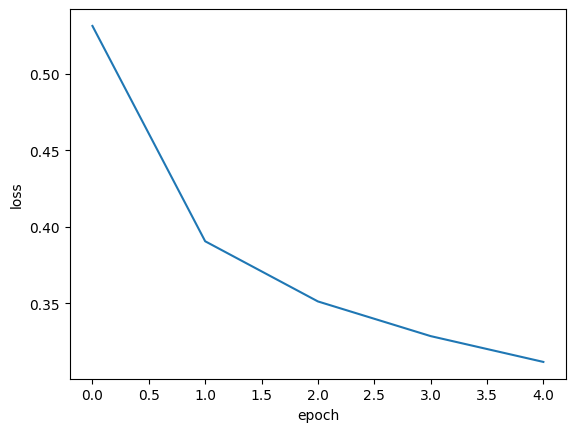

In [64]:
import matplotlib.pyplot as plt
# history 속성에 포함된 손실과 정확도는 에포크마다 계산한 값이 순서대로 나열된
# 단순한 리스트로 matplotlib으로 쉽게 그래프 처리 가능
plt.plot(history.history['loss'])
plt.xlabel('epoch')
# python index는 0부터 시작함 / 5개의 epoch가 0 ~ 4까지 x축에 표한
plt.ylabel('loss')    # 손실된 값
plt.show()

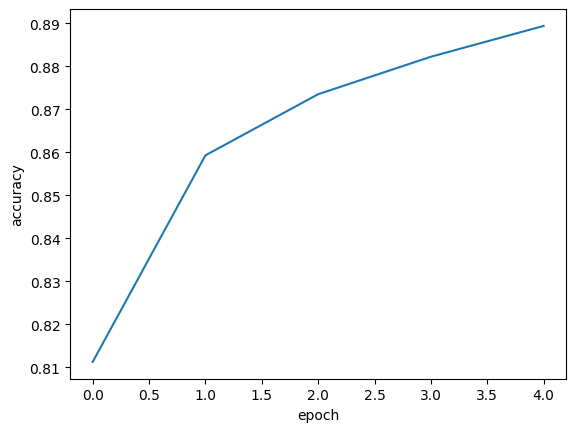

In [65]:
# 정확도 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()
# 결과분석 : epoch 마다 손실이 감소하고 정확도가 향상됨

In [66]:
# epoch를 20회로 증가시켜 출력

model = model_fn()    # 위의 메서드로 모델 생성(3개층으로 구성 / 입력층, 은닉층, 출력층)
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0)

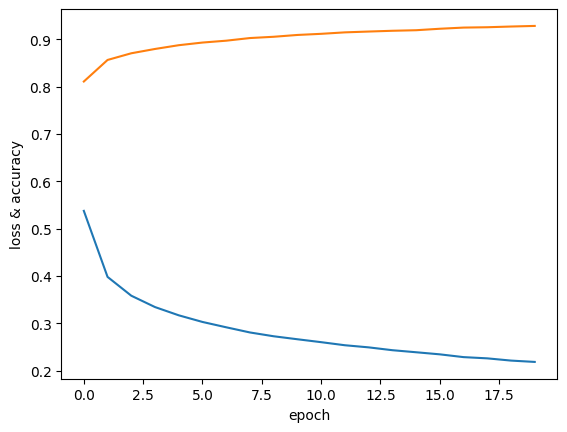

In [67]:
# 손실률 및 정확도 확인 차트
plt.plot(history.history['loss'])    # 파란색
plt.plot(history.history['accuracy'])    # 주황색
plt.xlabel('epoch')
plt.ylabel('loss & accuracy')
plt.show()

In [68]:
# 검증손실
# 확률적 경사 하강법을 사용하였을 때 과대/과소 적합과 에포크 사이에 관계 부분이 존재하였음
# 인공신경망은 모두 일종의 경사 하강법을 사용하기 때문에 동일한 개념이 여기에도 적용됨

# 에포크에 따른 과대적합, 과소적합을 파악하려면 훈련세트 점수와 검증세트 점수에 대한 점수도 필요함
# 그래서 위처럼 훈련세트의 손실과 정확도만 그리면 파악이 어려움
# 때문에 검증 손실을 이용하여 과대/과소적합을 응용하면 됨

# keypoint
# 손실을 사용하는 것과 정확도를 사용하는것의 차이점 확인
# 인공신경망 모델이 최적화하는 대상은 정확도가 아니라 손실함수이고,
# 손실 감소에 비례하여 정확도가 높아지지 않는 경우도 존재하는데,
# 모델이 잘 훈련되었는지 판단하려면 정확도보다는 손실함수의 값을 확인하는 것이 더 좋은 방법임

In [69]:
model = model_fn()
model.compile(loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1, validation_data = (val_scaled, val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7608 - loss: 0.6817 - val_accuracy: 0.8484 - val_loss: 0.4271
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8512 - loss: 0.4081 - val_accuracy: 0.8586 - val_loss: 0.3910
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8686 - loss: 0.3628 - val_accuracy: 0.8598 - val_loss: 0.3859
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8755 - loss: 0.3391 - val_accuracy: 0.8621 - val_loss: 0.3755
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8849 - loss: 0.3211 - val_accuracy: 0.8603 - val_loss: 0.3916
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8915 - loss: 0.3082 - val_accuracy: 0.8658 - val_loss: 0.3957
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8952 - loss: 0.2964 - val_accuracy: 0.8652 - val_loss: 0.3949
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9003 - loss: 0.2868 -

In [70]:
print(history.history.keys())    # 훈련세트와 검증세트의 정확도 및 손실율

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


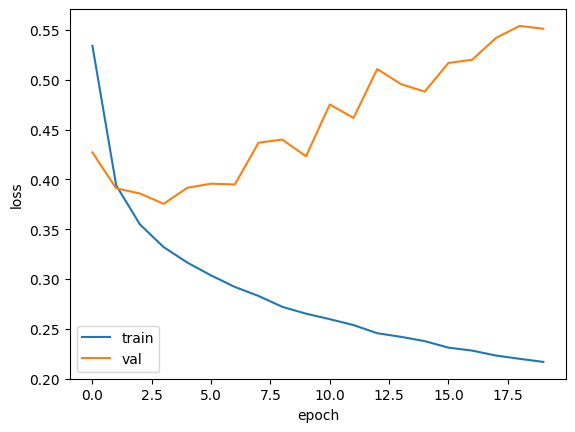

In [71]:
# 과대/과소적합 문제를 조사하기 위해 훈련손실, 검증손실을 한 그래프에 그려서 비교
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 결과분석 : 초기에 검증손실이 감소하다가 5번째 epoch 지점에서 다시 상승함
# 훈련손실은 꾸준히 감소하기 때문에 과대적합 모델이 만들어짐
# 검증손실이 상승하는 시점을 가능한 늦추면 세트에 대한 손실이 줄어들고, 검증세트에 대한 정활도가 증가할 것으로 예상됨

# 과대적합을 막기 위한 방법으로 규제방식 대신에 신경망에 특화된 규제방법인 드롭아웃을 사용

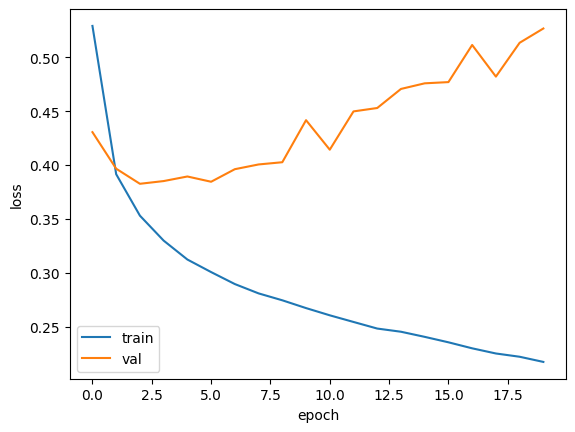

In [72]:
# 지금은 옵티마이저 하이퍼파라미터를 조절하여 과대적합을 완화
# RMSprop 옵티마이저는 많은 문제에서 잘 동작함 -> adam도 사용가능
model = model_fn()
model.compile(optimizer = 'RMSprop', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [73]:
model = model_fn()
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer = adagrad, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

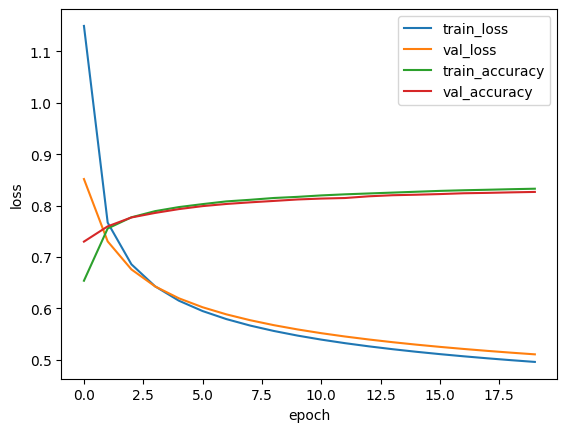

In [74]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [75]:
model = model_fn()
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

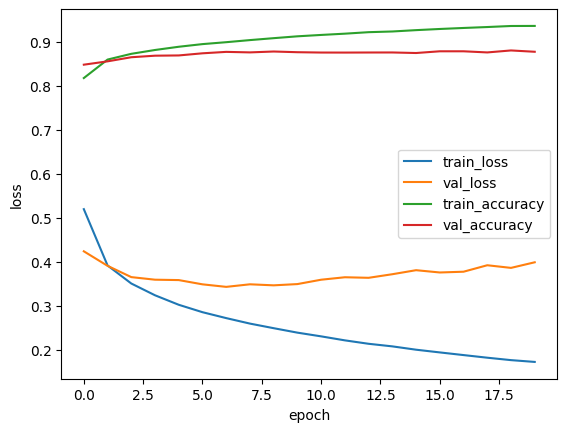

In [76]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [ ]:
# Dropout(드롭아웃) : 딥러닝의 기초가 되는 제프리 힌턴이 소개한 것으로 훈련과정에서 층에 있는 일부 뉴런을 랜덤하게 꺼서
#                     (뉴런 출력을 0으로 만듦) 과대적합을 막는것

# 어떤 샘플을 처리할 때 은닉층의 두번째 뉴런이 드롭아웃되어 h2 출력이 없음
# 다른 샘플을 처리할 때는 은닉층의 첫번쨰 뉴런이 드롭아웃되어 h1 출력이 없음
# 뉴런은 랜덤하게 드롭아웃되고 얼마나 많은 뉴런을 드롭할지 우리가 하이퍼파라미터에 정함

# 드롭아웃이 왜 과대적합을 막을 수 있을지 생각을 해보면 이전 층의 일부 뉴런이 랜덤하게 꺼지면
# 특정 뉴런에 과대하게 의존하는 것을 감소시킬 수 있고, 모든 입력에 대해 주의를 기울여야함
# 일부 뉴런의 출력이 없을 수 있다는 것을 감안하면, 이 신경망은 더 안정적인 예측을 만들 수 있다는 것임

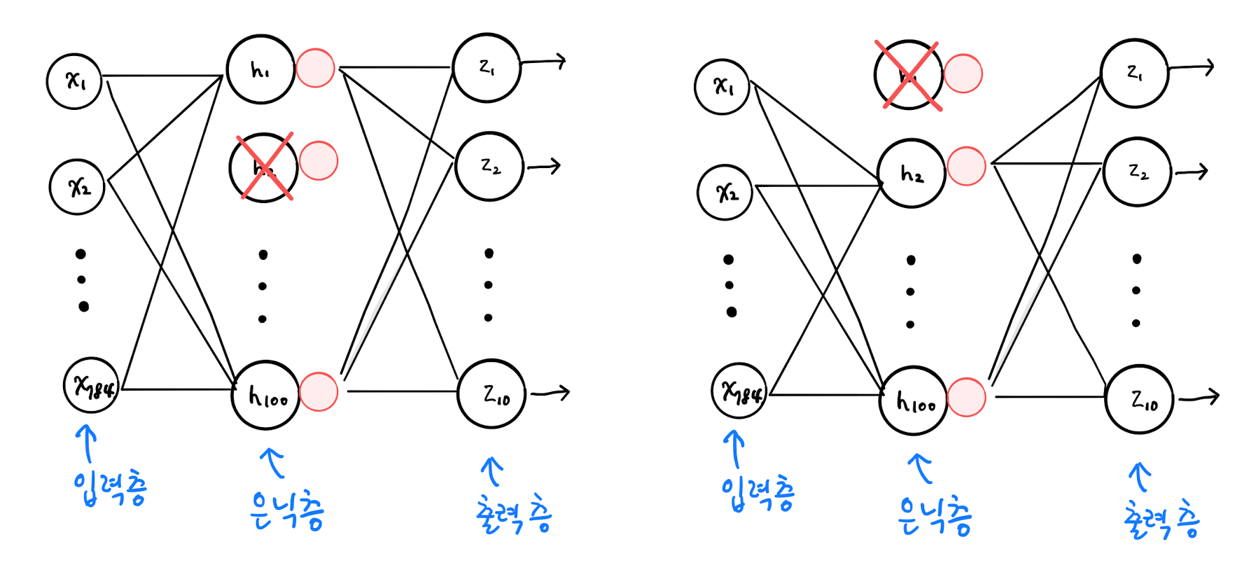

In [86]:
# 또 다른 분석
# 앞의 드롭아웃이 적용된 2개의 신경망 그림을 보면 드롭아웃을 적용하여 훈련하는 것은
# 마치 2개의 신경망을 앙상블하는 것처럼 상상하게끔 함
# 앙상블 : 더 좋은 예측을 만들기 위해 여러 개의 모델을 3훈련하는 머신런닝의 알고리즙으로
# 과대적합을 막아주는 좋은 기법임

# 케라스에서 드롭아웃을 keras.layers.Dropout으로 제공하며, 어떤 층의 뒤에 드롭아웃을 두어 이 층의 출력을 랜덤하게 0으로 만듦
# 드롭아웃이 층처럼 사용되지만 훈련되는 파라미터는 없음

# model_fn 함수에 드롭아웃 객체를 전달하여 층을 추가함
model = model_fn(keras.layers.Dropout(0, 3))    # 30%정도 드롭아웃

model.summary()
# 요악확인
# 은닉층 뒤에 추가된 드롭아웃 층(3번째 값)은 훈련되는 모델 파라미터가 없음
# 입력과 출력의 크기가 같으며, 일부 뉴런의 출력을 0으로 만들지만 전체 출력 배열의 크기를 바꾸지는 않음

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_21 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# 주의사항 : 훈련이 끝난뒤 평가나 예측을 수행할 때는 드롭아웃을 적용하지 않음
# 훈련된 모든 뉴런을 사용해야 올바른 예측이 수행됨
# tensorflow와 keras는 모델을 평가와 예측에 사용할 때 자동으로 드롭아웃을 적용하지 않음

# 훈련손실과 검정손실 그래프
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
histrory = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))

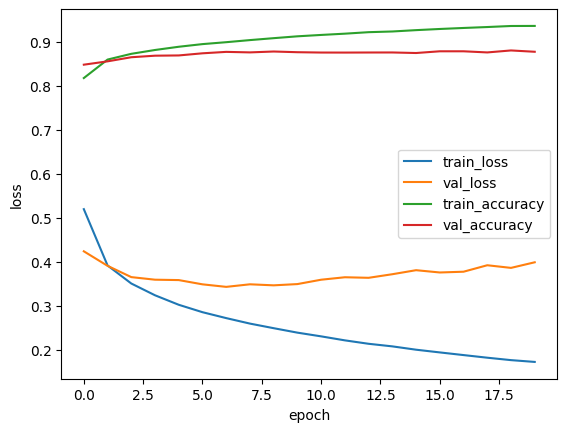

In [88]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [92]:
# 차후에 재활용하기 위해서 모델 저장과 복원도 실시
model = model_fn(keras.layers.Dropout(0, 3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 0, validation_data = (val_scaled, val_target))
model.save('model-whole.keras')    # 모델 저장
# 케라스 모델은 훈련된 모델의 파라미터를 저장하는 save_weights() 메서드가 있음
    # 참고 URL / https://www.tensorflow.org/guide/checkpoint?hl=ko
# tensorflow의 체크포인트 포맷으로 저장하지만 .h5일 경우 HDF5 포맷으로 저장함
    # 참고 URL / https://geunuk.tistory.com/466
model.save_weights('model.weights.h5')    # HDF5 형식으로 저장

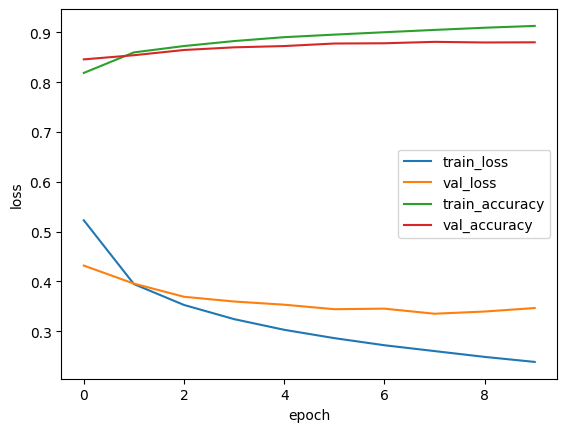

In [93]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [94]:
# 저장한 모델을 불러와 테스트 진행
!ls -al model*

-rw-r--r-- 1 root root 971928 Jan 10 05:53 model.weights.h5
-rw-r--r-- 1 root root 974763 Jan 10 05:53 model-whole.keras


In [95]:
# Test-1
# 훈련하지 않은 새로운 모델을 만들고 model.weights.h5 파일에서 훈련된 모델 파라미터를 읽어 사용

# model_fn() 위와 동일한 모델 구성
model = model_fn(keras.layers.Dropout(0, 3))

model.load_weights('model.weights.h5')
# 이때 사용하는 메서드는 save_weights()와 쌍을 이루는 load_weight() 메서드임
    # 주의사항 : load_weight() 메서드를 사용하려면
    #            save_weight() 메서드로 저장하였던 모델과 정확히 같은 구조를 가져야함

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_25 (Flatten)                 │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [99]:
# 모델의 검증 정확도 확인
import numpy as np

# predict() 메서드는 사이킷런과 다른 샘플마다 10개의 클래스에 대한 확률 반환(다중분류)

# 패션 MNIST 데이터셋에서 덜어낸 검증 세트의 샘플수는 12,000개이기 때문에
# predict() 메서드는 (12000, 10) 크기의 배열을 반환함
# 10개의 확률 중 가장 큰 값의 인덱스를 골라(.argmax) 타깃 레이블과 비교하여 정확도 계산
val_labels = np.argmax(model.predict(val_scaled), axis = -1)

# axis = -1 : 배열의 마지막 차원을 따라 최대값을 고름
# 검증세트는 2차원 배열이기 때문에 마지막 차원은 1이 됨
# 예들들어 아래 그림처럼 5 x 3 배열에 axis = 1로 한값과 axis = 0으로 한 값의 인덱스를 반환함

# argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여 같으면 1이되고, 다르면 0이 됨
# 이를 평균으로 출력(정확도)
print(np.mean(val_labels == val_target))

# axis = 1 : 열을 따라 각 행의 최대값의 인덱스 선택 / axis = 0 : 행을 따라 각 열의 최대값의 인덱스 선택
# 그 다음 라인은 argmax()로 고른 인덱스(val_labels)와 타깃(val_target)을 비교하여
# 두 배열에서 각 위치의 값이 같으면 1, 다르면 0으로 표기(평균화하면 정확도가 됨)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
0.8800833333333333


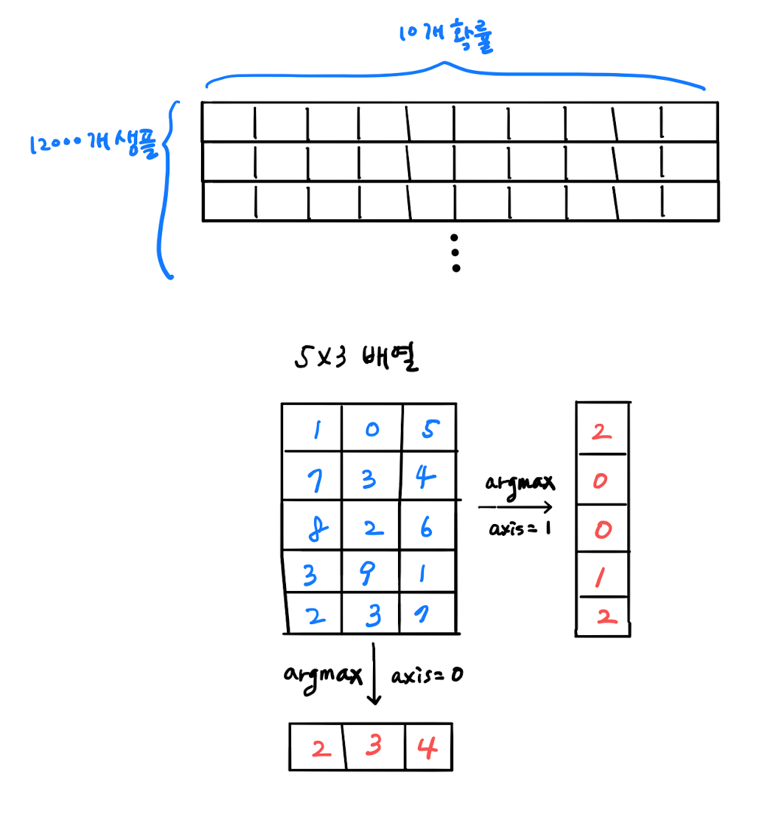

In [100]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도를 출력
model = keras.models.load_model('model-whole.keras')    # load_model() : 저장된 케라스 파일 읽기

model.evaluate(val_scaled, val_target)    # 같은 모델을 불러들였기 떄문에 위와 정확도가 같음

# 현 상태 분석 : 20번의 에포크 동안 모델을 훈련하여 검증 점수가 상승하는 지점 확인
# 모델을 과대적합 되지않은 에포크만큼 다시 훈련
# 모델을 두번씩 훈련하지 않고 한번에 끝내는 방법 연구 필요 -> keras callback

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8817 - loss: 0.3471


[0.3467273712158203, 0.8800833225250244]

In [103]:
# Test-2
# 아예 파일로 새로운 모델을 만들고 바로 사용 / +++++ callback(콜백) 사용
# callback(콜백) : 훈련과정 중간에 어떤 작업을 수행할 수 있게 하는 객체 / keras.callback 패키지에 있음
    # fit() 메서드의 callback 매개변수에 리스트로 전달하여 사용
# ModelCheckpoint callback을 사용할 예정이며, 에포크마다 모델을 저장함
# save_best_only = True : 매개변수를 지정, 가장 낮은 검증점수를 만드는 모델 저장가능

model = model_fn(keras.layers.Dropout(0, 3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only = True)

model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb])
# 모델 훈련 후 best-model.keras에 최상의 검증점수를 낸 모델이 저장됨

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [104]:
model = keras.models.load_model('best-model.keras')
# load_model로 저장했던 값을 불러와 다시 예측 실행
model.evaluate(val_scaled, val_target)
# keras.vallbacks.ModelCheckpoint 콜백이 가장낮은 검증점수의 모델을 자동으로 저장해 줌
# 여전히 20번의 에포크 기간동안 훈련을 함
# 사실 검증 점수가 상승하기 시작하면 그 이후에는 과대적합이 됨
# 더 커지기 때문에 혼련을 계속할 필요가 없음
# 이때 훈련을 종료하면 자원과 시간을 아낄 수 있음 -> 조기종려(early stopping)
# 조기 종료는 딥러닝 분야에 많이 사용하는 기법
# 에포크 횟수를 제한하는 역할이지만 모델이 과대적합 되는 것을 막아주기도 함 -> 규제방법중 하나

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.3428


[0.34353694319725037, 0.8770833611488342]

In [106]:
# 케라스에는 조기종료를 위한 EarlyStopping 콜백을 제공함
# 이 콜백의 patience 매개변수는 검증 점수가 향상되지 않더라도 참을 에포크 횟수로 지정
# patience = 2 : 2번연속 검증점수가 향상되지 않으면 훈련을 중지(patience : 인내심)
# restore_best_weights = True : 가장 낮은 검증 손실을 낸 모델 파라미터로 구동

model = model_fn(keras.layers.Dropout(0, 3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only = True)

# 가장 낮은 검증 손실의 모델을 파일에 저장하고 검증 손실이 다시 상승할 때 훈련을 중지할 수 있음
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)

# 훈련을 중지하고 현재의 파라미터를 최상의 파라미터로 되돌림
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1, validation_data = (val_scaled, val_target), callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7668 - loss: 0.6728 - val_accuracy: 0.8372 - val_loss: 0.4521
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8529 - loss: 0.4106 - val_accuracy: 0.8529 - val_loss: 0.4002
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8689 - loss: 0.3622 - val_accuracy: 0.8625 - val_loss: 0.3746
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8791 - loss: 0.3314 - val_accuracy: 0.8683 - val_loss: 0.3659
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8881 - loss: 0.3099 - val_accuracy: 0.8695 - val_loss: 0.3620
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8926 - loss: 0.2924 - val_accuracy: 0.8712 - val_loss: 0.3564
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8981 - loss: 0.2782 - val_accuracy: 0.8741 - val_loss: 0.3541
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9025 - loss: 0.2653 - 

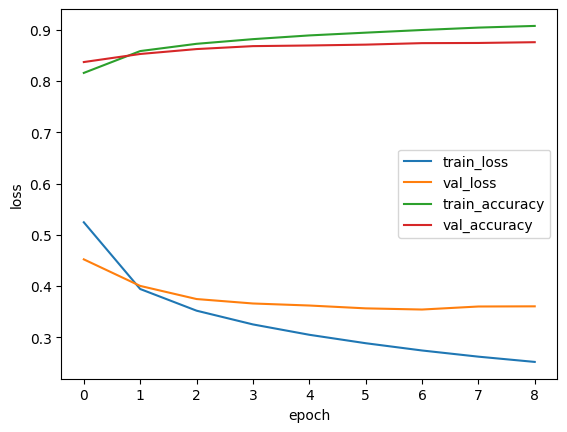

In [112]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss', 'train_accuracy', 'val_accuracy'])
plt.show()

In [108]:
print(early_stopping_cb.stopped_epoch)    # 조기종료 시점

8


In [113]:
model.evaluate(val_scaled, val_target)    # 검증세트의 성능 확인(35.41% / 87.41% / epoch 8회)
# 컴퓨터의 자원과 시간을 아끼고 콜백과 함께 사용하면 최상의 모델을 자동으로 저장해줌

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8772 - loss: 0.3565


[0.35413944721221924, 0.8740833401679993]